# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [4]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv")
#print(data)
print(data.head(10))


   year     name   percent  sex
0  1880     John  0.081541  boy
1  1880  William  0.080511  boy
2  1880    James  0.050057  boy
3  1880  Charles  0.045167  boy
4  1880   George  0.043292  boy
5  1880    Frank  0.027380  boy
6  1880   Joseph  0.022229  boy
7  1880   Thomas  0.021401  boy
8  1880    Henry  0.020641  boy
9  1880   Robert  0.020404  boy


Questions

1. Delete unnamed columns

In [6]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
print(data.head(10))

   year     name   percent  sex
0  1880     John  0.081541  boy
1  1880  William  0.080511  boy
2  1880    James  0.050057  boy
3  1880  Charles  0.045167  boy
4  1880   George  0.043292  boy
5  1880    Frank  0.027380  boy
6  1880   Joseph  0.022229  boy
7  1880   Thomas  0.021401  boy
8  1880    Henry  0.020641  boy
9  1880   Robert  0.020404  boy


2. Show the distribution of male and female

In [5]:
a=data["sex"].value_counts(dropna=False)
print(a)

girl    129000
boy     129000
Name: sex, dtype: int64


3. Show the top 5 most preferred names

In [4]:
n = 5
b=data['name'].value_counts()[:n].index.tolist()
print("Most popular 5 names are:",b)

Most popular 5 names are: ['Jessie', 'Leslie', 'Jean', 'Guadalupe', 'Lee']


4. What is the median name occurence in the dataset

In [5]:
data.describe()
f=data.median()

print("The median is",f)

#As i discussed with Mr.Sudhanshu, he asked me to Arrange all the data by Alphabetical order
# Arrange all the data by Alphabetical order
sort=data.sort_values('name')
print(sort)

The median is year       1944.000000
percent       0.000164
dtype: float64
        year     name   percent   sex
128342  2008    Aaden  0.000442   boy
255089  2006  Aaliyah  0.001790  girl
245334  1996  Aaliyah  0.000434  girl
256082  2007  Aaliyah  0.001870  girl
253093  2004  Aaliyah  0.001726  girl
...      ...      ...       ...   ...
151385  1902     Zula  0.000235  girl
173766  1924     Zula  0.000073  girl
162570  1913     Zula  0.000122  girl
136376  1887     Zula  0.000212  girl
175794  1926     Zula  0.000068  girl

[258000 rows x 4 columns]


5. Distribution of male and female born count by states

In [6]:
#As i discussed with Mr.Sudhanshu, it is not possible
#There are only 4 columns available (year, name, percent & sex). 
#we can't count the male and female born count by states (there is no state column, and there is no way to find state)
#So, i calculated the number of babies born in each year from 1880 to 2008
group=data.groupby("year")
group.count()


,name,percent,sex
year,,,
1880,2000,2000,2000
1881,2000,2000,2000
1882,2000,2000,2000
1883,2000,2000,2000
1884,2000,2000,2000
...,...,...,...
2004,2000,2000,2000
2005,2000,2000,2000
2006,2000,2000,2000


In [22]:
#calculated the number of babies born in each year from 1880 to 2008, seperating boys and girls (no.of boys and no.of girld born by eachh year)
group1=data.groupby(['year','sex'])
group1.count()

name  percent
year sex                
1880 boy   1000     1000
     girl  1000     1000
1881 boy   1000     1000
     girl  1000     1000
1882 boy   1000     1000
...         ...      ...
2006 girl  1000     1000
2007 boy   1000     1000
     girl  1000     1000
2008 boy   1000     1000
     girl  1000     1000

[258 rows x 2 columns]

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


Text(0, 0.5, 'Minimum and Maximum temperatures')

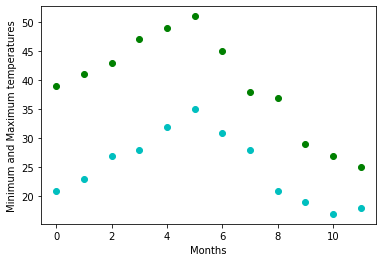

In [13]:
import numpy as np

max_tmp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_tmp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, max_tmp, 'go')
plt.plot(months, min_tmp, 'co')
plt.xlabel('Months')
plt.ylabel('Minimum and Maximum temperatures')


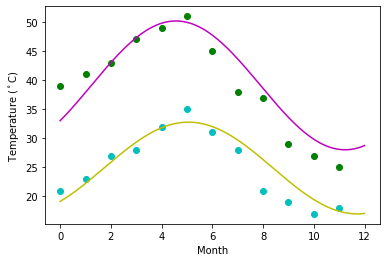

In [14]:
import scipy
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_tmp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_tmp, [-40, 20, 0])



days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_tmp, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, min_tmp, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()